In [1]:
import cv2
import face_recognition
import numpy as np
import torch
import torch.nn.functional as F
from collections import OrderedDict
from Architecture import anti_spoofing
import time
import dlib

In [19]:


image1 = face_recognition.load_image_file("1.jpg")
image_encode1 = face_recognition.face_encodings(image1)[0]

image2 = face_recognition.load_image_file("3.jpg")
image_encode2 = face_recognition.face_encodings(image2)[0]

known_faces = [image_encode1, image_encode2]
known_names = ['bassem', 'Soudy']

device = torch.device("cpu")
model = anti_spoofing().to(device)
weights_path = 'model.pth'
state_dict = torch.load(weights_path, map_location=torch.device('cpu'))
new_state_dict = OrderedDict()
for key, value in state_dict.items():
    name_key = key[7:]
    new_state_dict[name_key] = value
model.load_state_dict(new_state_dict)
model.eval()

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()


    detector = dlib.get_frontal_face_detector()
    faces = detector(frame)

    for face in faces:
        x, y, width, height = face.left(), face.top(), face.width(), face.height()
        h, w, c = np.shape(frame)

        scale = min((h - 1) / height, min((w - 1) / width, 2.7))
        new_width = width * scale
        new_height = height * scale
        center_x, center_y = width / 2 + x, height / 2 + y

        left_top_x = center_x - new_width / 2
        left_top_y = center_y - new_height / 2
        right_bottom_x = center_x + new_width / 2
        right_bottom_y = center_y + new_height / 2

        left_top_x = max(0, int(left_top_x))
        left_top_y = max(0, int(left_top_y))
        right_bottom_x = min(w - 1, int(right_bottom_x))
        right_bottom_y = min(h - 1, int(right_bottom_y))

        face_region = frame[left_top_y:right_bottom_y + 1, left_top_x:right_bottom_x + 1]
        face_region = cv2.resize(face_region, (80, 80))
        face_tensor = torch.from_numpy(face_region.transpose((2, 0, 1))).float()
        face_tensor = face_tensor.unsqueeze(0).to(torch.device('cpu'))

        with torch.no_grad():
            output = model.forward(face_tensor)
            result = F.softmax(output, dim=-1).cpu().numpy()

        label = np.argmax(result)
        value = result[0][label]

        if label == 1:
            new_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            locations = face_recognition.face_locations(new_frame)
            faces = face_recognition.face_encodings(new_frame, locations)
            
            names = []
            for face in faces:
                compare = face_recognition.compare_faces(known_faces, face)
                similarity = face_recognition.face_distance(known_faces, face)
                if compare[np.argmin(similarity)]:
                    name = known_names[np.argmin(similarity)]
                else:
                    name = "Unknown"
                names.append(name)

            for (y_, h_, w_, x_), name in zip(locations, names):
                cv2.rectangle(frame, (x_, y_), (h_, w_), (255, 0, 0), 2)
                cv2.putText(frame, name, (x_ + 6, y_ - 40), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 255), 1)

        else:
            # print("Fake Face Detected. Score: {:.2f}".format(value))
            cv2.rectangle(frame, (x, y), (x + width, y + height), (255, 0, 0), 2)
            cv2.putText(frame, 'Fake', (x + 6, y - 40), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 255), 1)

        cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])


In [3]:
import cv2
import face_recognition
import numpy as np
import torch
import torch.nn.functional as F
from collections import OrderedDict
from Architecture import anti_spoofing
import time

image1 = face_recognition.load_image_file("1.jpg")
image_encode1 = face_recognition.face_encodings(image1)[0]

image2 = face_recognition.load_image_file("3.jpg")
image_encode2 = face_recognition.face_encodings(image2)[0]

known_faces = [image_encode1, image_encode2]
known_names = ['bassem', 'Soudy']


ima = cv2.imread('1.jpg')


device = torch.device("cpu")
model = anti_spoofing().to(device)
weights_path = 'model.pth'
state_dict = torch.load(weights_path, map_location=torch.device('cpu'))
new_state_dict = OrderedDict()
for key, value in state_dict.items():
    name_key = key[7:]
    new_state_dict[name_key] = value
model.load_state_dict(new_state_dict)
model.eval()

detector = dlib.get_frontal_face_detector()
faces = detector(ima)

for face in faces:
    x, y, width, height = face.left(), face.top(), face.width(), face.height()
    h, w, c = np.shape(frame)

    scale = min((h - 1) / height, min((w - 1) / width, 2.7))
    new_width = width * scale
    new_height = height * scale
    center_x, center_y = width / 2 + x, height / 2 + y

    left_top_x = center_x - new_width / 2
    left_top_y = center_y - new_height / 2
    right_bottom_x = center_x + new_width / 2
    right_bottom_y = center_y + new_height / 2

    left_top_x = max(0, int(left_top_x))
    left_top_y = max(0, int(left_top_y))
    right_bottom_x = min(w - 1, int(right_bottom_x))
    right_bottom_y = min(h - 1, int(right_bottom_y))

    face_region = frame[left_top_y:right_bottom_y + 1, left_top_x:right_bottom_x + 1]
    face_region = cv2.resize(face_region, (80, 80))
    face_tensor = torch.from_numpy(face_region.transpose((2, 0, 1))).float()
    face_tensor = face_tensor.unsqueeze(0).to(torch.device('cpu'))

    with torch.no_grad():
        output = model.forward(face_tensor)
        result = F.softmax(output, dim=-1).cpu().numpy()

    label = np.argmax(result)
    value = result[0][label]

    if label == 1:
        new_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        locations = face_recognition.face_locations(new_frame)
        faces = face_recognition.face_encodings(new_frame, locations)

        names = []
        for face in faces:
            compare = face_recognition.compare_faces(known_faces, face)
            similarity = face_recognition.face_distance(known_faces, face)
            if compare[np.argmin(similarity)]:
                name = known_names[np.argmin(similarity)]
            else:
                name = "Unknown"
            names.append(name)

        for (y_, h_, w_, x_), name in zip(locations, names):
            cv2.rectangle(frame, (x_, y_), (h_, w_), (255, 0, 0), 2)
            cv2.putText(frame, name, (x_ + 6, y_ - 40), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 255), 1)

    else:
        # print("Fake Face Detected. Score: {:.2f}".format(value))
            cv2.rectangle(frame, (x, y), (x + width, y + height), (255, 0, 0), 2)
            cv2.putText(frame, 'Fake', (x + 6, y - 40), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 255), 1)

   

torch.Size([1, 512])


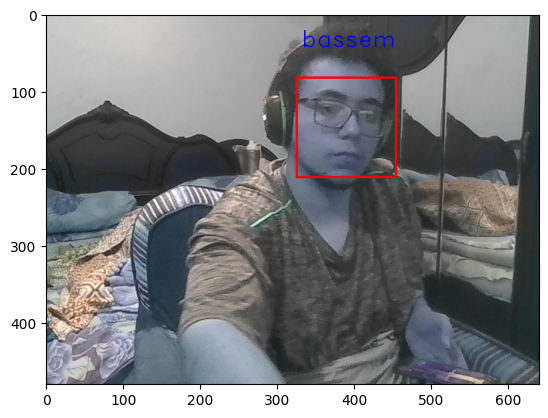

In [6]:
plt.imshow(frame)

In [44]:
import matplotlib.pyplot as plt

def load_model():
    device = torch.device("cpu")
    model = anti_spoofing().to(device)
    weights_path = 'model.pth'
    state_dict = torch.load(weights_path, map_location=torch.device('cpu'))
    new_state_dict = OrderedDict()
    for key, value in state_dict.items():
        name_key = key[7:]
        new_state_dict[name_key] = value
    model.load_state_dict(new_state_dict)
    model.eval()
    return model

def crop_image(org_img, x, y, width, height, s = 2.7):
    
    h, w, c = np.shape(org_img)
    scale = min((h-1)/height, min((w-1)/width, s))
    new_width = width * scale
    new_height = height * scale
    center_x, center_y = width/2+x, height/2+y

    left_top_x = center_x-new_width/2
    left_top_y = center_y-new_height/2
    right_bottom_x = center_x+new_width/2
    right_bottom_y = center_y+new_height/2

    if left_top_x < 0:
        right_bottom_x -= left_top_x
        left_top_x = 0

    if left_top_y < 0:
        right_bottom_y -= left_top_y
        left_top_y = 0

    if right_bottom_x > w-1:
        left_top_x -= right_bottom_x-w+1
        right_bottom_x = w-1

    if right_bottom_y > h-1:
        left_top_y -= right_bottom_y-h+1
        right_bottom_y = h-1


    image = org_img[int(left_top_y): int(right_bottom_y)+1,
                              int(left_top_x): int(right_bottom_x)+1]

    image = cv2.resize(image, (80, 80))
    
    return image


image1 = face_recognition.load_image_file("2.jpg")
image_encode1 = face_recognition.face_encodings(image1)[0]

image2 = face_recognition.load_image_file("3.jpg")
image_encode2 = face_recognition.face_encodings(image2)[0]

known_faces = [image_encode1, image_encode2]
known_names = ['bassem', 'Soudy']

model = load_model()

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()


    detector = dlib.get_frontal_face_detector()
    faces = detector(frame)

    for face in faces:
        x, y, width, height = face.left(), face.top(), face.width(), face.height()
        
        croped_image = crop_image(frame, s = 2.7, x = x, y = y, width = width, height = height)
        
        face_tensor = torch.from_numpy(croped_image.transpose((2, 0, 1))).float()
        face_tensor = face_tensor.unsqueeze(0).to(torch.device('cpu'))

        with torch.no_grad():
            output = model.forward(face_tensor)
            result = F.softmax(output, dim=-1).cpu().numpy()

        label = np.argmax(result)
        value = result[0][label]
        
        if label == 1:
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
        
            encoded_face = face_recognition.face_encodings(rgb_frame, [(x, y, width, height)])[0]

            # Compare the current face with known faces
            face_distances = face_recognition.face_distance(known_faces, encoded_face)
            best_match_index = np.argmin(face_distances)
            
            # Experiment with this threshold value
            recognition_threshold = 0.7  # Adjust this value according to your needs

            if face_distances[best_match_index] < recognition_threshold:
                name = known_names[best_match_index]
            else:
                name = "Unknown"

            cv2.rectangle(frame, (x_, y_), (h_, w_), (255, 0, 0), 2)
            cv2.putText(frame, name, (x_ + 6, y_ - 40), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 255), 1)

        else:
            cv2.rectangle(frame, (x, y), (x + width, y + height), (255, 0, 0), 2)
            cv2.putText(frame, 'Fake', (x + 6, y - 40), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 255), 1)

        cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])


In [80]:
import matplotlib.pyplot as plt

def load_model():
    device = torch.device("cpu")
    model = anti_spoofing().to(device)
    weights_path = 'model.pth'
    state_dict = torch.load(weights_path, map_location=torch.device('cpu'))
    new_state_dict = OrderedDict()
    for key, value in state_dict.items():
        name_key = key[7:]
        new_state_dict[name_key] = value
    model.load_state_dict(new_state_dict)
    model.eval()
    return model

def crop_image(org_img, x, y, width, height, s = 2.7):
    
    h, w, c = np.shape(org_img)
    scale = min((h-1)/height, min((w-1)/width, s))
    new_width = width * scale
    new_height = height * scale
    center_x, center_y = width/2+x, height/2+y

    left_top_x = center_x-new_width/2
    left_top_y = center_y-new_height/2
    right_bottom_x = center_x+new_width/2
    right_bottom_y = center_y+new_height/2

    if left_top_x < 0:
        right_bottom_x -= left_top_x
        left_top_x = 0

    if left_top_y < 0:
        right_bottom_y -= left_top_y
        left_top_y = 0

    if right_bottom_x > w-1:
        left_top_x -= right_bottom_x-w+1
        right_bottom_x = w-1

    if right_bottom_y > h-1:
        left_top_y -= right_bottom_y-h+1
        right_bottom_y = h-1


    image = org_img[int(left_top_y): int(right_bottom_y)+1,
                              int(left_top_x): int(right_bottom_x)+1]

    image = cv2.resize(image, (80, 80))
    
    return image


image1 = face_recognition.load_image_file("2.jpg")
image_encode1 = face_recognition.face_encodings(image1)[0]

image2 = face_recognition.load_image_file("3.jpg")
image_encode2 = face_recognition.face_encodings(image2)[0]

known_faces = [image_encode1, image_encode2]
known_names = ['bassem', 'Soudy']

model = load_model()

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    locations = face_recognition.face_locations(rgb_frame)
    faces = face_recognition.face_encodings(rgb_frame, locations)
    
    for face, location in zip(faces, locations):
        
        y_min, x_max, y_max, x_min = location

        croped_image = crop_image(frame, s = 2.7, x = x_min, y = y_max, width = (x_max - x_min), height = (y_max - y_min))
        face_tensor = torch.from_numpy(croped_image.transpose((2, 0, 1))).float()
        face_tensor = face_tensor.unsqueeze(0).to(torch.device('cpu'))

        with torch.no_grad():
            output = model.forward(face_tensor)
            result = F.softmax(output, dim=-1).cpu().numpy()

        label = np.argmax(result)
        value = result[0][label]
        
        if label == 1:            
        
            face_distances = face_recognition.face_distance(known_faces, face)
            best_match_index = np.argmin(face_distances)
            
            recognition_threshold = 0.7 
            
            
            if face_distances[best_match_index] < recognition_threshold:
                name = known_names[best_match_index]
            else:
                name = "Unknown"

            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
            cv2.putText(frame, name, (x_min + 6, y_min - 40), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 255), 1)

        else:
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
            cv2.putText(frame, 'Fake', (x_min + 6, y_min - 40), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 255), 1)

        cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])


In [14]:
import matplotlib.pyplot as plt
import cv2
import face_recognition
import numpy as np
import torch
import torch.nn.functional as F
from collections import OrderedDict
from Architecture import anti_spoofing
import time

def load_model():
    global model
    device = torch.device("cpu")
    model = anti_spoofing().to(device)
    weights_path = 'model.pth'
    state_dict = torch.load(weights_path, map_location=torch.device('cpu'))
    new_state_dict = OrderedDict()
    for key, value in state_dict.items():
        name_key = key[7:]
        new_state_dict[name_key] = value
    model.load_state_dict(new_state_dict)
    model.eval()
    return model

def crop_image(org_img, x, y, width, height, s=2.7, space=10):
    h, w, c = np.shape(org_img)
    scale = min((h - 1) / height, min((w - 1) / width, s))
    new_width = width * scale
    new_height = height * scale
    center_x, center_y = width / 2 + x, height / 2 + y

    left_top_x = max(center_x - new_width / 2 - space, 0)
    left_top_y = max(center_y - new_height / 2 - space, 0)
    right_bottom_x = min(center_x + new_width / 2 + space, w - 1)
    right_bottom_y = min(center_y + new_height / 2 + space, h - 1)

    image = org_img[int(left_top_y):int(right_bottom_y) + 1,
                    int(left_top_x):int(right_bottom_x) + 1]

    image = cv2.resize(image, (80, 80))

    return image

# def crop_image(org_img, x, y, width, height, s = 2.7):
    
#     h, w, c = np.shape(org_img)
#     scale = min((h-1)/height, min((w-1)/width, s))
#     new_width = width * scale
#     new_height = height * scale
#     center_x, center_y = width/2+x, height/2+y

#     left_top_x = center_x-new_width/2
#     left_top_y = center_y-new_height/2
#     right_bottom_x = center_x+new_width/2
#     right_bottom_y = center_y+new_height/2

#     if left_top_x < 0:
#         right_bottom_x -= left_top_x
#         left_top_x = 0

#     if left_top_y < 0:
#         right_bottom_y -= left_top_y
#         left_top_y = 0

#     if right_bottom_x > w-1:
#         left_top_x -= right_bottom_x-w+1
#         right_bottom_x = w-1

#     if right_bottom_y > h-1:
#         left_top_y -= right_bottom_y-h+1
#         right_bottom_y = h-1


#     image = org_img[int(left_top_y): int(right_bottom_y)+1,
#                               int(left_top_x): int(right_bottom_x)+1]

#     image = cv2.resize(image, (80, 80))
    
#     return image

def preprocess(img):
    
    face_tensor = torch.from_numpy(img.transpose((2, 0, 1))).float()
    face_tensor = face_tensor.unsqueeze(0).to(torch.device('cpu'))
    
    return face_tensor

def predict(face_tensor):

    with torch.no_grad():
            output = model.forward(face_tensor)
            result = F.softmax(output, dim=-1).cpu().numpy()
    label = np.argmax(result)
    value = result[0][label]

    return label, value
    
image1 = face_recognition.load_image_file("2.jpg")
image_encode1 = face_recognition.face_encodings(image1)[0]

image2 = face_recognition.load_image_file("3.jpg")
image_encode2 = face_recognition.face_encodings(image2)[0]

known_faces = [image_encode1, image_encode2]
known_names = ['bassem', 'Soudy']

model = load_model()

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    locations = face_recognition.face_locations(rgb_frame)
    faces = face_recognition.face_encodings(rgb_frame, locations)
    
    for face, location in zip(faces, locations):
        y_min, x_max, y_max, x_min = location
        croped_image = crop_image(rgb_frame, s = 2.7, x = x_min, y = y_max, width = (x_max - x_min), height = (y_max - y_min))
        cv2.imwrite('test.jpg', croped_image)
        face_tensor = preprocess(croped_image)
        label, value = predict(face_tensor)
        
        if label == 1:            
        
            face_distances = face_recognition.face_distance(known_faces, face)
            best_match_index = np.argmin(face_distances)
            
            recognition_threshold = 0.6
            
            if face_distances[best_match_index] < recognition_threshold:
                name = known_names[best_match_index]
            else:
                name = "Unknown"

            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
            cv2.putText(frame, name, (x_min + 6, y_min - 40), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 255), 1)

        else:
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
            cv2.putText(frame, 'Fake', (x_min + 6, y_min - 40), cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 255), 1)

        cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
